In [19]:
import pandas as pd
import numpy as np
import joblib
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [20]:
data_path = r'C:\Users\azizh\OneDrive\Bureau\TekSpire 2.0\Dataset\Disease and symptoms dataset.csv'
data = pd.read_csv(data_path)

data.head()

,diseases,anxiety and nervousness,depression,shortness of breath,depressive or psychotic symptoms,sharp chest pain,dizziness,insomnia,abnormal involuntary movements,chest tightness,...,stuttering or stammering,problems with orgasm,nose deformity,lump over jaw,sore in nose,hip weakness,back swelling,ankle stiffness or tightness,ankle weakness,neck weakness
0,panic disorder,1,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,panic disorder,0,0,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,panic disorder,1,1,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,panic disorder,1,0,0,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,panic disorder,1,1,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [21]:
disease_counts = data['diseases'].value_counts()
print(disease_counts.head(10))

diseases
cystitis                          1219
vulvodynia                        1218
nose disorder                     1218
complex regional pain syndrome    1217
spondylosis                       1216
hypoglycemia                      1215
peripheral nerve disorder         1215
esophagitis                       1215
vaginal cyst                      1215
conjunctivitis due to allergy     1215
Name: count, dtype: int64


In [22]:
top_diseases = [
    'cystitis', 'vulvodynia', 'nose disorder', 
    'complex regional pain syndrome', 'spondylosis',
    'hypoglycemia', 'peripheral nerve disorder',
    'esophagitis', 'vaginal cyst', 'conjunctivitis due to allergy'
]

In [23]:
df_top = data[data['diseases'].isin(top_diseases)].reset_index(drop=True)


In [24]:
print("Diseases after filtering:", df_top['diseases'].unique())

Diseases after filtering: ['spondylosis' 'complex regional pain syndrome' 'vulvodynia'
 'hypoglycemia' 'conjunctivitis due to allergy' 'vaginal cyst'
 'nose disorder' 'cystitis' 'esophagitis' 'peripheral nerve disorder']


In [25]:
X = df_top.drop('diseases', axis=1)  # symptom features
y = df_top['diseases']               # disease label


In [26]:
from sklearn.tree import DecisionTreeClassifier

# Multi-class decision tree
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X, y)

# Feature importance
importances = pd.Series(tree.feature_importances_, index=X.columns).sort_values(ascending=False)

# Take top 20 features
top_features_tree = importances.head(20).index.tolist()
print(top_features_tree)


['difficulty in swallowing', 'involuntary urination', 'eye redness', 'leg weakness', 'ear pain', 'heavy menstrual flow', 'feeling ill', 'hand or finger pain', 'hip pain', 'vaginal discharge', 'upper abdominal pain', 'symptoms of bladder', 'lacrimation', 'lower body pain', 'seizures', 'facial pain', 'arm weakness', 'problems during pregnancy', 'neck pain', 'burning abdominal pain']


In [27]:
selected_features = [
    'difficulty in swallowing', 'involuntary urination', 'eye redness', 
    'leg weakness', 'ear pain', 'heavy menstrual flow', 'feeling ill', 
    'hand or finger pain', 'hip pain', 'vaginal discharge', 
    'upper abdominal pain', 'symptoms of bladder', 'lacrimation', 
    'lower body pain', 'seizures', 'facial pain', 'arm weakness', 
    'problems during pregnancy', 'neck pain', 'burning abdominal pain'
]

columns_to_keep = ['diseases'] + selected_features
df_reduced = df_top[columns_to_keep]

# --- Verify result ---
print(df_reduced['diseases'].value_counts())
print(df_reduced.head())

diseases
cystitis                          1219
vulvodynia                        1218
nose disorder                     1218
complex regional pain syndrome    1217
spondylosis                       1216
hypoglycemia                      1215
conjunctivitis due to allergy     1215
vaginal cyst                      1215
esophagitis                       1215
peripheral nerve disorder         1215
Name: count, dtype: int64
      diseases  difficulty in swallowing  involuntary urination  eye redness  \
0  spondylosis                         0                      0            0   
1  spondylosis                         0                      0            0   
2  spondylosis                         0                      0            0   
3  spondylosis                         0                      0            0   
4  spondylosis                         0                      0            0   

   leg weakness  ear pain  heavy menstrual flow  feeling ill  \
0             0         0     

In [28]:
df_reduced.shape

(12163, 21)

In [29]:
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12163 entries, 0 to 12162
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   diseases                   12163 non-null  object
 1   difficulty in swallowing   12163 non-null  int64 
 2   involuntary urination      12163 non-null  int64 
 3   eye redness                12163 non-null  int64 
 4   leg weakness               12163 non-null  int64 
 5   ear pain                   12163 non-null  int64 
 6   heavy menstrual flow       12163 non-null  int64 
 7   feeling ill                12163 non-null  int64 
 8   hand or finger pain        12163 non-null  int64 
 9   hip pain                   12163 non-null  int64 
 10  vaginal discharge          12163 non-null  int64 
 11  upper abdominal pain       12163 non-null  int64 
 12  symptoms of bladder        12163 non-null  int64 
 13  lacrimation                12163 non-null  int64 
 14  lower 

Correlation with disease target:
diseases_encoded             1.000000
vaginal discharge            0.468200
heavy menstrual flow         0.285012
problems during pregnancy    0.277550
hip pain                     0.199812
lower body pain              0.199120
burning abdominal pain       0.176188
leg weakness                 0.122358
arm weakness                 0.119476
ear pain                     0.040759
facial pain                  0.040486
seizures                    -0.040397
feeling ill                 -0.040466
neck pain                   -0.119363
upper abdominal pain        -0.122643
difficulty in swallowing    -0.122948
symptoms of bladder         -0.203052
involuntary urination       -0.204920
lacrimation                 -0.281641
eye redness                 -0.285468
hand or finger pain         -0.359944
Name: diseases_encoded, dtype: float64


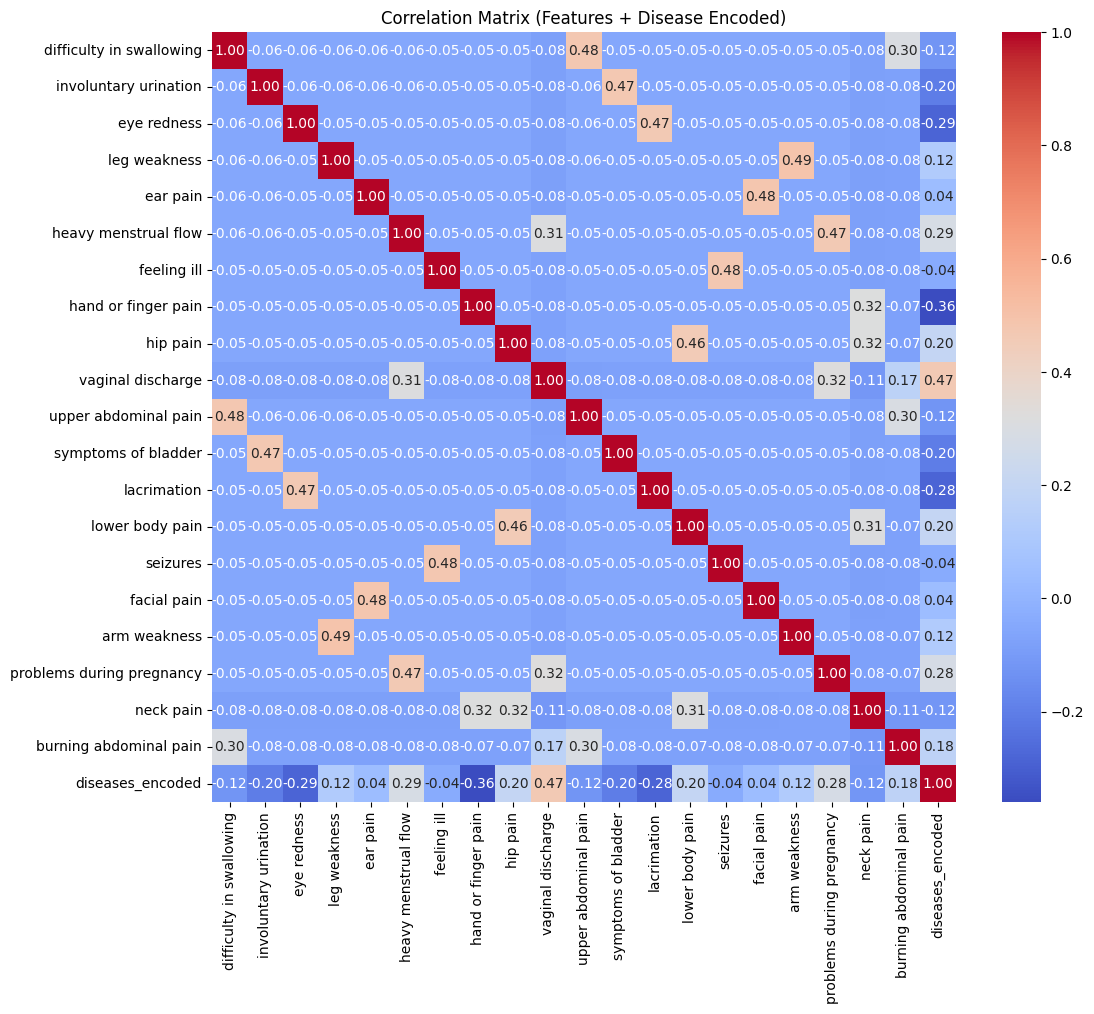

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# df_reduced = votre dataset 'diseases' + 20 features
df_corr = df_reduced.copy()

# Encode target et forcer type int
le = LabelEncoder()
df_corr['diseases_encoded'] = le.fit_transform(df_corr['diseases']).astype(int)

# Sélectionner uniquement les features + target encodée
cols_for_corr = df_corr.columns.drop('diseases')  # ignore string 'diseases'
corr_matrix = df_corr[cols_for_corr].corr()

# Vérifier la corrélation avec la target
target_corr = corr_matrix['diseases_encoded'].sort_values(ascending=False)
print("Correlation with disease target:")
print(target_corr)

# Heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix (Features + Disease Encoded)")
plt.show()


Entrainement de modele

In [31]:
# Features et target
X = df_reduced.drop('diseases', axis=1)
y = df_reduced['diseases']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [32]:
# Encode target
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}
results = []

for name, model in models.items():
    # 5-fold cross-validation on training set
    cv_score = cross_val_score(model, X_train, y_train_encoded, cv=5, scoring='accuracy')
    
    # Train on entire training set
    model.fit(X_train, y_train_encoded)
    y_pred = model.predict(X_test)
    
    # Store metrics
    results.append({
        'Model': name,
        'CV mean accuracy': round(cv_score.mean(), 4),
        'CV std': round(cv_score.std(), 4),
        'Test accuracy': round(accuracy_score(y_test_encoded, y_pred), 4),
        'F1 score': round(f1_score(y_test_encoded, y_pred, average='weighted'), 4),
        'Precision': round(precision_score(y_test_encoded, y_pred, average='weighted'), 4),
        'Recall': round(recall_score(y_test_encoded, y_pred, average='weighted'), 4)
    })
result_df = pd.DataFrame(results).sort_values(by='Test accuracy', ascending=False)
result_df

,Model,CV mean accuracy,CV std,Test accuracy,F1 score,Precision,Recall
0,Decision Tree,0.7873,0.0068,0.7908,0.8202,0.9005,0.7908
2,Random Forest,0.7873,0.0068,0.7908,0.8202,0.9005,0.7908
1,KNN,0.7803,0.0064,0.7682,0.8026,0.8680,0.7682


GridSearch pour Decision Tree

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Param grid
param_grid = {
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Base model
dt = DecisionTreeClassifier(random_state=42)

# GridSearch
grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train_encoded)

print("Best Parameters:")
print(grid_search.best_params_)

print("\nBest CV Accuracy:")
print(grid_search.best_score_)


Best Parameters:
{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}

Best CV Accuracy:
0.7872559095580678


Evaluate Best Model on Test Set

In [38]:
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

acc = accuracy_score(y_test_encoded, y_pred)
f1 = f1_score(y_test_encoded, y_pred, average='weighted')
precision = precision_score(y_test_encoded, y_pred, average='weighted')
recall = recall_score(y_test_encoded, y_pred, average='weighted')

print("\nTest Accuracy:", acc)
print("F1:", f1)
print("Precision:", precision)
print("Recall:", recall)



Test Accuracy: 0.790793259350596
F1: 0.8201962024035255
Precision: 0.9005195432769437
Recall: 0.790793259350596


On log avec MLflow

In [39]:
import mlflow
import mlflow.sklearn

mlflow.set_experiment("Disease_Classification_DecisionTree")

with mlflow.start_run():

    mlflow.log_params(grid_search.best_params_)
    mlflow.log_metric("cv_best_accuracy", grid_search.best_score_)
    mlflow.log_metric("test_accuracy", acc)
    mlflow.log_metric("f1_score", f1)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("recall", recall)

    mlflow.sklearn.log_model(best_model, "best_decision_tree_model")


2026/02/17 16:19:09 INFO alembic.runtime.plugins: setup plugin alembic.autogenerate.schemas
2026/02/17 16:19:09 INFO alembic.runtime.plugins: setup plugin alembic.autogenerate.tables
2026/02/17 16:19:09 INFO alembic.runtime.plugins: setup plugin alembic.autogenerate.types
2026/02/17 16:19:09 INFO alembic.runtime.plugins: setup plugin alembic.autogenerate.constraints
2026/02/17 16:19:09 INFO alembic.runtime.plugins: setup plugin alembic.autogenerate.defaults
2026/02/17 16:19:09 INFO alembic.runtime.plugins: setup plugin alembic.autogenerate.comments
2026/02/17 16:19:10 INFO mlflow.store.db.utils: Creating initial MLflow database tables...
2026/02/17 16:19:10 INFO mlflow.store.db.utils: Updating database tables
2026/02/17 16:19:10 INFO alembic.runtime.migration: Context impl SQLiteImpl.
2026/02/17 16:19:10 INFO alembic.runtime.migration: Will assume non-transactional DDL.
2026/02/17 16:19:10 INFO alembic.runtime.migration: Running upgrade  -> 451aebb31d03, add metric step
2026/02/17 16:1

In [ ]:
mlflow.sklearn.log_model(best_model, "best_decision_tree_model")
#pour charger le modèle plus tard
#import mlflow.sklearn

#model = mlflow.sklearn.load_model("runs:/<RUN_ID>/best_decision_tree_model")


2026/02/17 16:23:14 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
C:\Users\azizh\AppData\Roaming\Python\Python311\site-packages\mlflow\models\model.py:1209: FutureWarning: Saving scikit-learn models in the pickle or cloudpickle format requires exercising caution because these formats rely on Python's object serialization mechanism, which can execute arbitrary code during deserialization.The recommended safe alternative is the 'skops' format.
  flavor.save_model(path=local_path, mlflow_model=mlflow_model, **kwargs)


In [42]:
import joblib

joblib.dump(best_model, "deciseas_prediction.pkl")


['deciseas_prediction.pkl']

In [43]:
joblib.dump(le, "label_encoder.pkl")
#le = joblib.load("label_encoder.pkl")


['label_encoder.pkl']

Code complet : prédiction d’un nouveau patient

In [47]:
import joblib
import pandas as pd

# -----------------------------
# 1️⃣ Charger modèle + encoder + features
# -----------------------------
model = joblib.load("deciseas_prediction.pkl")
le = joblib.load("label_encoder.pkl")
feature_names = joblib.load("label_encoder.pkl")
# 🔥 Récupérer les noms des features depuis le dataset
feature_names = df_reduced.drop('diseases', axis=1).columns.tolist()

# -----------------------------
# 2️⃣ Entrée manuelle
# -----------------------------
print("\nEnter patient symptoms (0 = No, 1 = Yes)\n")

user_input = {}

for feature in feature_names:
    while True:
        try:
            value = int(input(f"{feature} (0 or 1): "))
            if value in [0, 1]:
                user_input[feature] = value
                break
            else:
                print("Please enter only 0 or 1.")
        except:
            print("Invalid input. Please enter 0 or 1.")

# -----------------------------
# 3️⃣ Convert to DataFrame
# -----------------------------
input_df = pd.DataFrame([user_input])

# -----------------------------
# 4️⃣ Prediction
# -----------------------------
prediction_encoded = model.predict(input_df)[0]
prediction_label = le.inverse_transform([prediction_encoded])[0]

print("\n==============================")
print("Predicted Disease:", prediction_label)
print("==============================\n")


Enter patient symptoms (0 = No, 1 = Yes)


Predicted Disease: esophagitis

